In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/healthcare/ehr_with_missing_1.csv')

In [ ]:
df.isnull().sum()

,0
patient_id,0
age,10
gender,0
diagnosis,0
medication,10
lab_test_value,10
readmission,0


In [ ]:
df.head()

,patient_id,age,gender,diagnosis,medication,lab_test_value,readmission
0,1001,53.131097,n,Diabetes,Insulin,9.2,1
1,1002,NaN,F,Diabetes,Insulin,9.3,0
2,1003,67.598547,F,Hypertension,Lisinopril,5.7,0
3,1004,39.614448,M,Diabetes,Insulin,9.4,1
4,1005,55.992984,M,Flu,Tamiflu,5.9,0


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
mis_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
df[["age","lab_test_value"]]=mis_mean.fit_transform(df[["age","lab_test_value"]])

In [ ]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
diagnosis,0
medication,10
lab_test_value,0
readmission,0


In [ ]:
df.sample(6)

,patient_id,age,gender,diagnosis,medication,lab_test_value,readmission
58,1059,60.358356,F,Hypertension,Lisinopril,6.8,0
20,1021,66.207339,F,Hypertension,Lisinopril,7.9,0
3,1004,39.614448,M,Diabetes,Insulin,9.4,1
81,1082,36.933690,M,Asthma,Albuterol,7.0,0
88,1089,65.654685,F,Hypertension,Lisinopril,5.8,0
6,1007,49.472209,M,COVID-19,Remdesivir,6.3,0


In [ ]:
df.dropna(subset=["medication"], axis=0, inplace=True)

df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
diagnosis,0
medication,0
lab_test_value,0
readmission,0


In [ ]:
df.shape

(90, 7)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['gender'].value_counts()

,count
gender,
M,42
F,40
n,8


In [ ]:
df.replace("n", np.nan, inplace = True)
df.head(5)

,patient_id,age,gender,diagnosis,medication,lab_test_value,readmission
0,1001,53.131097,NaN,Diabetes,Insulin,9.2,1
1,1002,55.553743,F,Diabetes,Insulin,9.3,0
2,1003,67.598547,F,Hypertension,Lisinopril,5.7,0
3,1004,39.614448,M,Diabetes,Insulin,9.4,1
4,1005,55.992984,M,Flu,Tamiflu,5.9,0


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
mis_mean=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[["gender"]]=mis_mean.fit_transform(df[["gender"]])

In [ ]:
df['gender'].value_counts()

,count
gender,
M,50
F,40


In [ ]:
df.head()

,patient_id,age,gender,diagnosis,medication,lab_test_value,readmission
0,1001,53.131097,M,Diabetes,Insulin,9.2,1
1,1002,55.553743,F,Diabetes,Insulin,9.3,0
2,1003,67.598547,F,Hypertension,Lisinopril,5.7,0
3,1004,39.614448,M,Diabetes,Insulin,9.4,1
4,1005,55.992984,M,Flu,Tamiflu,5.9,0


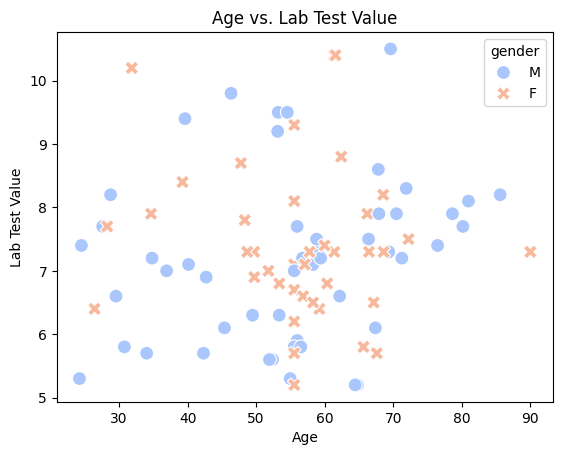

In [ ]:
# Scatter plot: Age vs. Lab Test Value colored by gender
sns.scatterplot(data=df, x='age', y='lab_test_value', hue='gender', style='gender', palette='coolwarm', s=100)
plt.title('Age vs. Lab Test Value')
plt.xlabel('Age')
plt.ylabel('Lab Test Value')
plt.show()


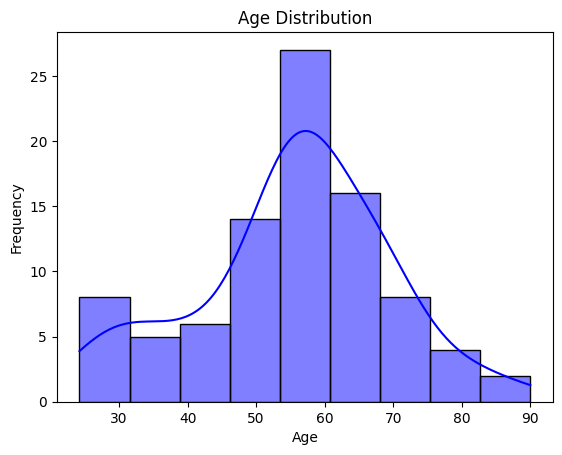

In [ ]:

sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-20-c8fbff7a4810>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='viridis')


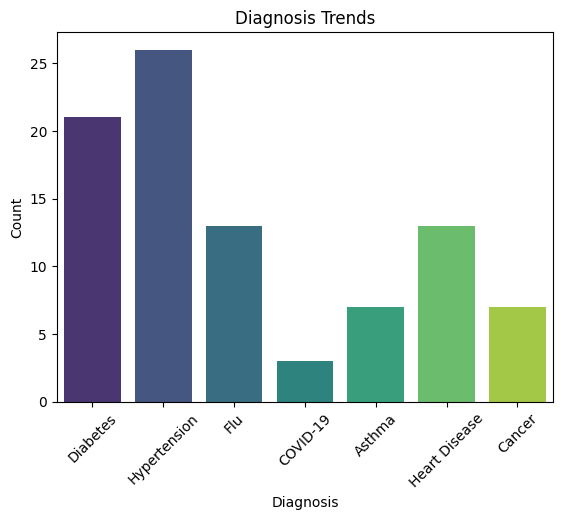

In [ ]:
sns.countplot(data=df, x='diagnosis', palette='viridis')
plt.title('Diagnosis Trends')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

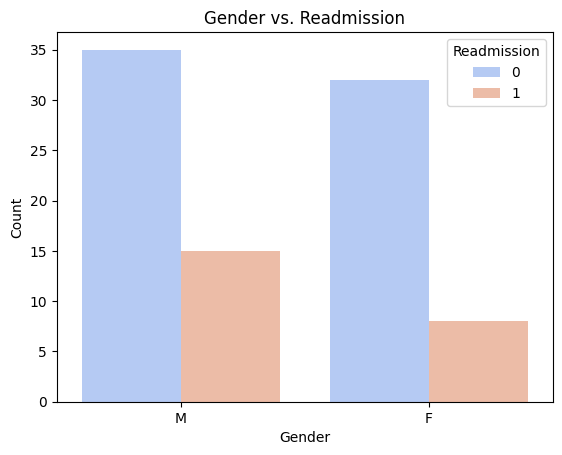

In [ ]:
sns.countplot(data=df, x='gender', hue='readmission', palette='coolwarm')
plt.title('Gender vs. Readmission')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmission')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['gender', 'diagnosis', 'medication'], drop_first=True)

In [ ]:
df.head()

,patient_id,age,lab_test_value,readmission,gender_M,diagnosis_COVID-19,diagnosis_Cancer,diagnosis_Diabetes,diagnosis_Flu,diagnosis_Heart Disease,diagnosis_Hypertension,medication_Aspirin,medication_Chemotherapy,medication_Insulin,medication_Lisinopril,medication_Remdesivir,medication_Tamiflu
0,1001,53.131097,9.2,1,True,False,False,True,False,False,False,False,False,True,False,False,False
1,1002,55.553743,9.3,0,False,False,False,True,False,False,False,False,False,True,False,False,False
2,1003,67.598547,5.7,0,False,False,False,False,False,False,True,False,False,False,True,False,False
3,1004,39.614448,9.4,1,True,False,False,True,False,False,False,False,False,True,False,False,False
4,1005,55.992984,5.9,0,True,False,False,False,True,False,False,False,False,False,False,False,True


In [ ]:
X = df.drop(columns=['patient_id', 'readmission'])
y = df['readmission']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

# 2. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

# 3. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

# Optional: Confusion Matrix for each model
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))


Decision Tree Accuracy: 0.4444444444444444
KNN Accuracy: 0.6666666666666666
Logistic Regression Accuracy: 0.7222222222222222

Decision Tree Confusion Matrix:
 [[7 6]
 [4 1]]

KNN Confusion Matrix:
 [[11  2]
 [ 4  1]]

Logistic Regression Confusion Matrix:
 [[12  1]
 [ 4  1]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cleaned_file_path = '/content/drive/MyDrive/healthcare/new_csv.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to /content/drive/MyDrive/healthcare/new_csv.csv


# assignment 2


<ipython-input-29-9f6a391456bb>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-29-9f6a391456bb>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

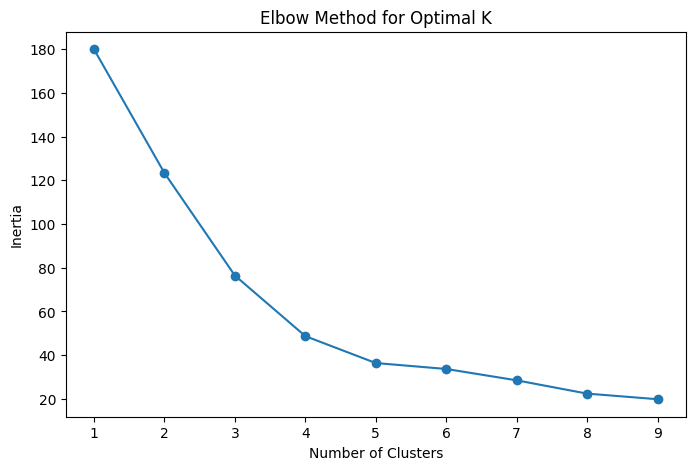

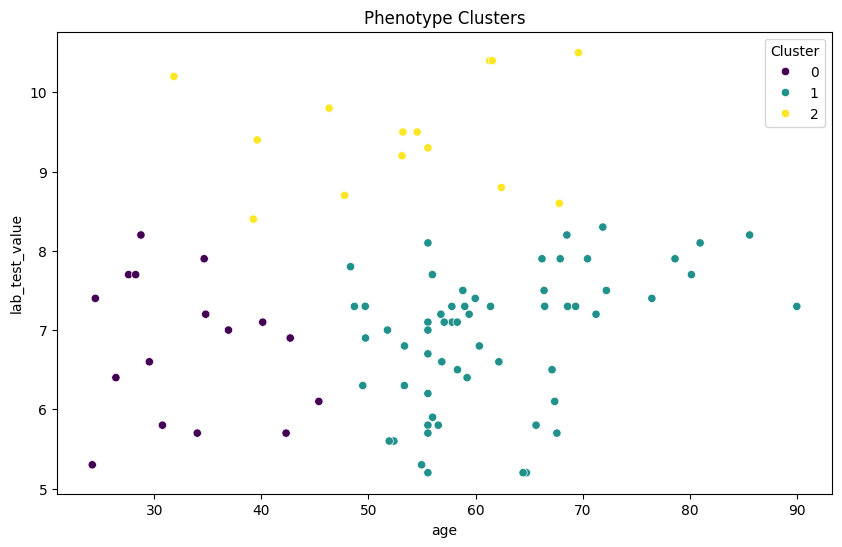

Cluster Summary Statistics:
               age  lab_test_value
Cluster                           
0        33.189251        6.793750
1        61.799338        6.903204
2        53.142390        9.478571


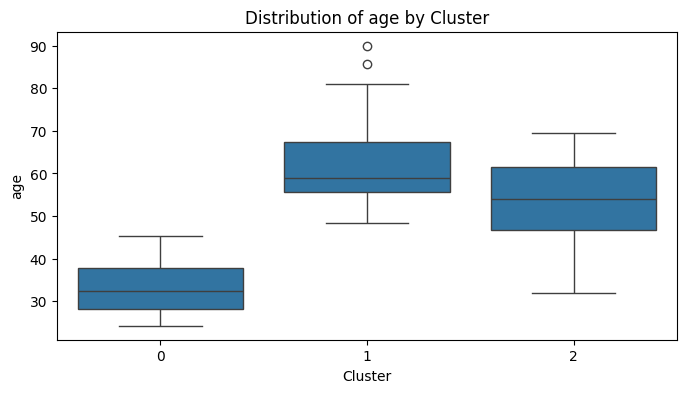

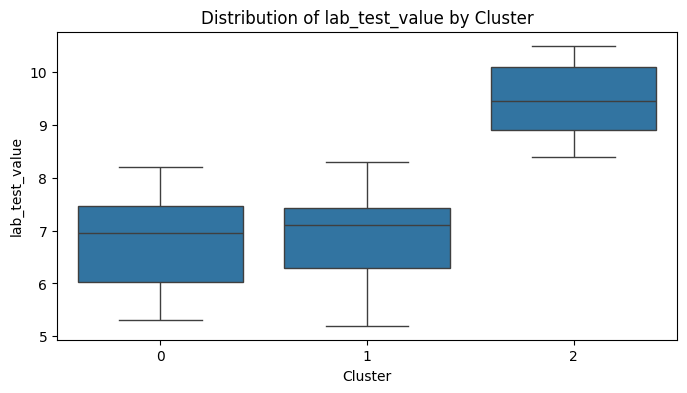

Silhouette Score: 0.4131863393754689


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score




df['age'].fillna(df['age'].mean(), inplace=True)
df['lab_test_value'].fillna(df['lab_test_value'].mean(), inplace=True)


features = df[['age', 'lab_test_value']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['lab_test_value'], hue=df['Cluster'], palette='viridis')
plt.title('Phenotype Clusters')
plt.show()


cluster_summary = df.groupby('Cluster')[['age', 'lab_test_value']].mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

# Plot box plots for feature distributions across clusters
for col in features.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Distribution of {col} by Cluster')
    plt.show()

# Silhouette Score for clustering evaluation
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", silhouette_avg)


Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         5

    accuracy                           0.96        27
   macro avg       0.98      0.96      0.97        27
weighted avg       0.97      0.96      0.96        27

Confusion Matrix:
[[ 8  1  0]
 [ 0 13  0]
 [ 0  0  5]]


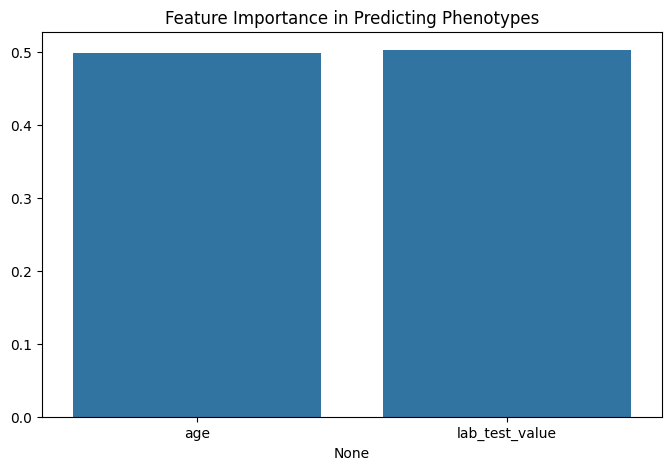

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


X = df[['age', 'lab_test_value']]  # Features
y = df['Cluster']  # Labels (clusters)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize the feature importance
feature_importances = rf_classifier.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=features.columns, y=feature_importances)
plt.title('Feature Importance in Predicting Phenotypes')
plt.show()


Health Outcome Summary by Phenotype:
         readmission_mean  readmission_median  readmission_std  \
Cluster                                                          
0                0.250000                 0.0         0.447214   
1                0.250000                 0.0         0.436667   
2                0.285714                 0.0         0.468807   

         lab_test_value_mean  lab_test_value_median  lab_test_value_std  
Cluster                                                                  
0                   6.793750                   6.95            0.887295  
1                   6.903204                   7.10            0.849259  
2                   9.478571                   9.45            0.706213  


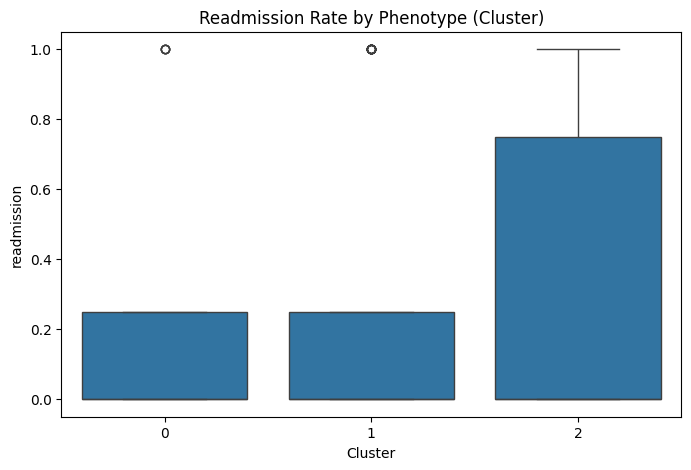

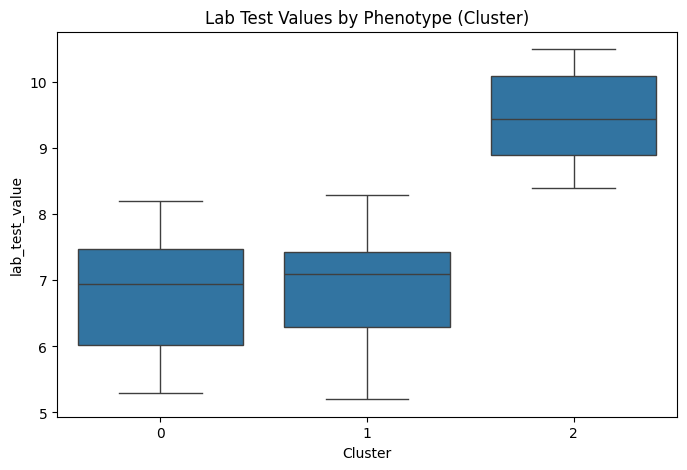

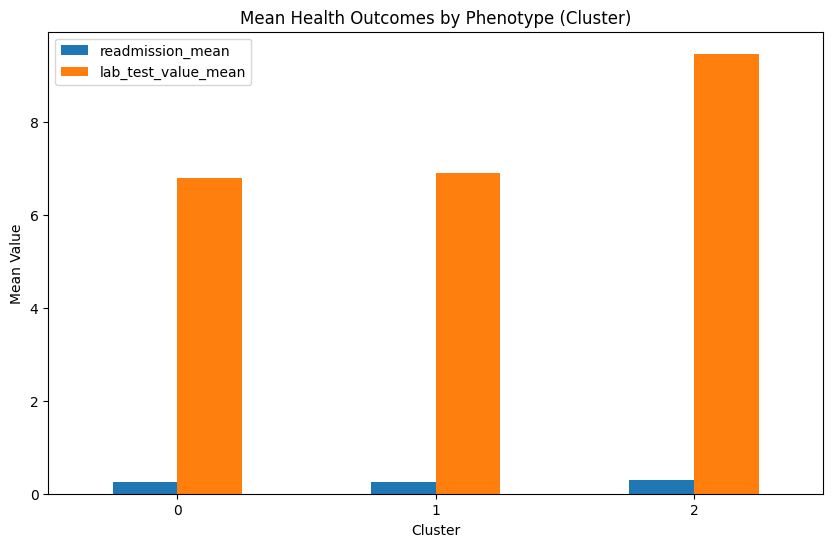

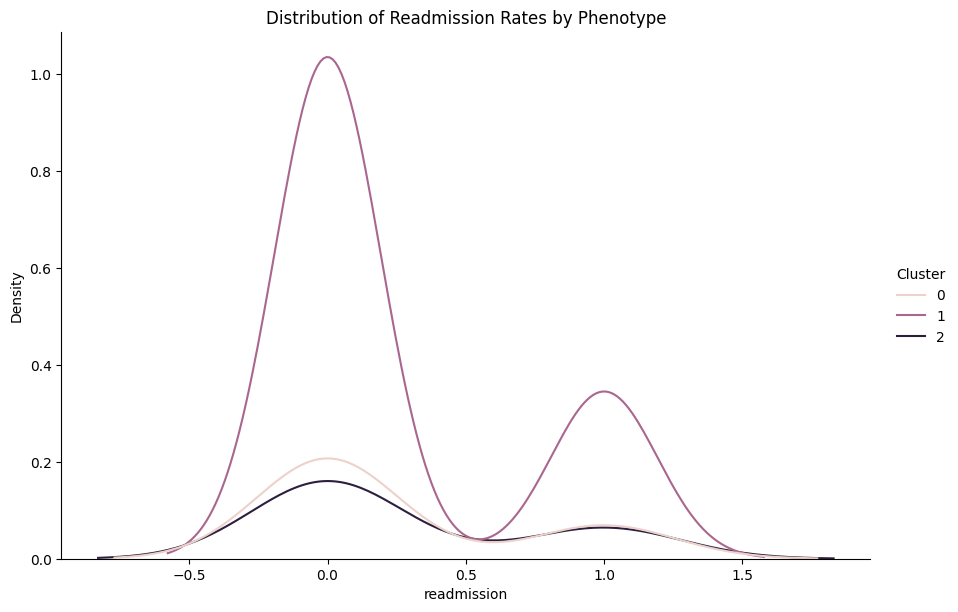

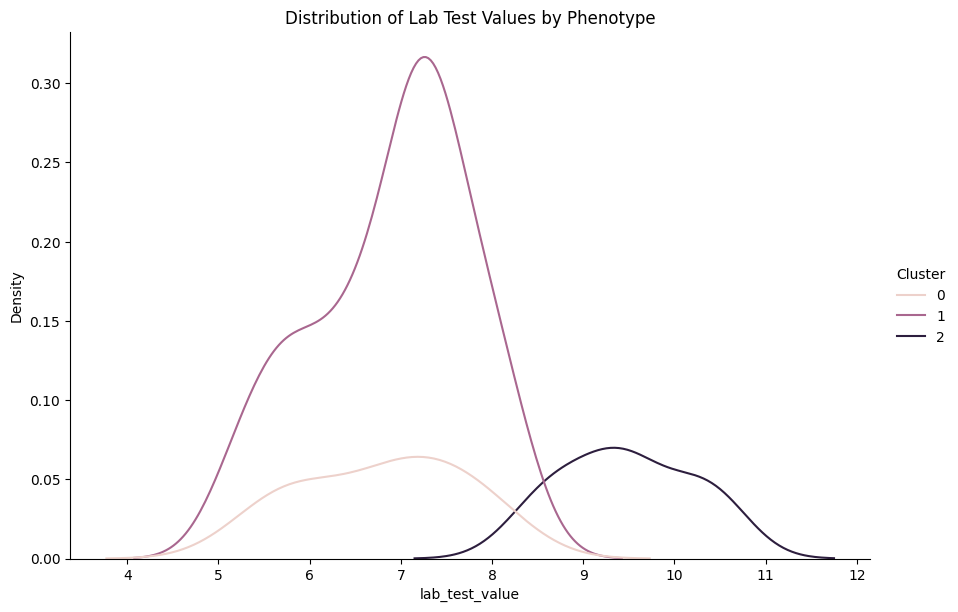

In [ ]:

health_outcomes = df[['Cluster', 'readmission', 'lab_test_value']]


cluster_health_summary = health_outcomes.groupby('Cluster').agg(
    readmission_mean=('readmission', 'mean'),
    readmission_median=('readmission', 'median'),
    readmission_std=('readmission', 'std'),
    lab_test_value_mean=('lab_test_value', 'mean'),
    lab_test_value_median=('lab_test_value', 'median'),
    lab_test_value_std=('lab_test_value', 'std')
)


print("Health Outcome Summary by Phenotype:")
print(cluster_health_summary)


plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='readmission', data=df)
plt.title('Readmission Rate by Phenotype (Cluster)')
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='lab_test_value', data=df)
plt.title('Lab Test Values by Phenotype (Cluster)')
plt.show()


health_outcomes_mean = cluster_health_summary[['readmission_mean', 'lab_test_value_mean']]

health_outcomes_mean.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Health Outcomes by Phenotype (Cluster)')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()


sns.displot(data=df, x='readmission', hue='Cluster', kind='kde', height=6, aspect=1.5)
plt.title('Distribution of Readmission Rates by Phenotype')
plt.show()

sns.displot(data=df, x='lab_test_value', hue='Cluster', kind='kde', height=6, aspect=1.5)
plt.title('Distribution of Lab Test Values by Phenotype')
plt.show()


In [6]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression

# Load preprocessed dataset
data = pd.read_csv("/content/drive/MyDrive/healthcare/ehr_with_missing_1.csv")

# Data preprocessing
data['age'].fillna(data['age'].median(), inplace=True)
data['lab_test_value'].fillna(data['lab_test_value'].median(), inplace=True)
data['medication'].fillna('Unknown', inplace=True)
data['gender'].replace('n', pd.NA, inplace=True)
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['gender', 'diagnosis', 'medication'], drop_first=True)

# Define features and target variables
diagnosis_cols = [col for col in data.columns if col.startswith("diagnosis_")]
feature_cols = [col for col in data.columns if col not in ['patient_id', 'readmission'] + diagnosis_cols]

X = data[feature_cols]
y = data[diagnosis_cols]

# Train logistic regression models for each diagnosis
models = {}
for diagnosis in diagnosis_cols:
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y[diagnosis])
    models[diagnosis] = model

# Save models and feature names
with open("risk_models.pkl", "wb") as file:
    pickle.dump(models, file)
with open("feature_names.pkl", "wb") as file:
    pickle.dump(feature_cols, file)


<ipython-input-6-2c1ad8c02b63>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-6-2c1ad8c02b63>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try